## 라이브러리 임포트

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_location='c:/windows/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

## 2020년 6월 ~ 2020년 10월 까지의 데이터
## 1. ASOS에서 서울 기상데이터 가져오기

In [3]:
url='http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=WLkYB%2FKWHeZjDmHmtxBSAXNn6ectaGGobMvefGm3NGOo%2Fowi4hfQJAcjpvqFdWOuMBNhGsyq2BrYzbkH8SH0Cw%3D%3D&numOfRows=200&dataCd=ASOS&dataType=JSON&dateCd=DAY&startDt=20200601&endDt=20201031&stnIds=108&pageNo=1'

In [4]:
response=requests.get(url)

In [5]:
a=response.json()
a

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'},
  'body': {'dataType': 'JSON',
   'items': {'item': [{'stnId': '108',
      'stnNm': '서울',
      'tm': '2020-06-01',
      'avgTa': '19.7',
      'minTa': '16.6',
      'minTaHrmt': '0528',
      'maxTa': '24.5',
      'maxTaHrmt': '1603',
      'mi10MaxRn': '0.3',
      'mi10MaxRnHrmt': '-2357',
      'hr1MaxRn': '0.3',
      'hr1MaxRnHrmt': '-2345',
      'sumRnDur': '3.75',
      'sumRn': '0.4',
      'maxInsWs': '12.3',
      'maxInsWsWd': '320',
      'maxInsWsHrmt': '1205',
      'maxWs': '6.2',
      'maxWsWd': '290',
      'maxWsHrmt': '1239',
      'avgWs': '3.4',
      'hr24SumRws': '2974',
      'maxWd': '290',
      'avgTd': '12.0',
      'minRhm': '37',
      'minRhmHrmt': '1609',
      'avgRhm': '64.3',
      'avgPv': '14.2',
      'avgPa': '999.7',
      'maxPs': '1010.5',
      'maxPsHrmt': '0008',
      'minPs': '1008.5',
      'minPsHrmt': '1525',
      'avgPs': '1009.6',
      'ssDur': '14.6

In [6]:
df=pd.DataFrame(a['response']['body']['items']['item'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   stnId           153 non-null    object
 1   stnNm           153 non-null    object
 2   tm              153 non-null    object
 3   avgTa           153 non-null    object
 4   minTa           153 non-null    object
 5   minTaHrmt       153 non-null    object
 6   maxTa           153 non-null    object
 7   maxTaHrmt       153 non-null    object
 8   mi10MaxRn       153 non-null    object
 9   mi10MaxRnHrmt   153 non-null    object
 10  hr1MaxRn        153 non-null    object
 11  hr1MaxRnHrmt    153 non-null    object
 12  sumRnDur        153 non-null    object
 13  sumRn           153 non-null    object
 14  maxInsWs        153 non-null    object
 15  maxInsWsWd      153 non-null    object
 16  maxInsWsHrmt    153 non-null    object
 17  maxWs           153 non-null    object
 18  maxWsWd   

In [7]:
df.loc[df['sumRn']=='','sumRn']='0'
df['sumRn']=df['sumRn'].astype(float)
df['sumRn']

0      0.4
1      2.0
2      0.0
3      0.2
4      0.0
      ... 
148    0.0
149    0.0
150    0.0
151    0.0
152    0.0
Name: sumRn, Length: 153, dtype: float64

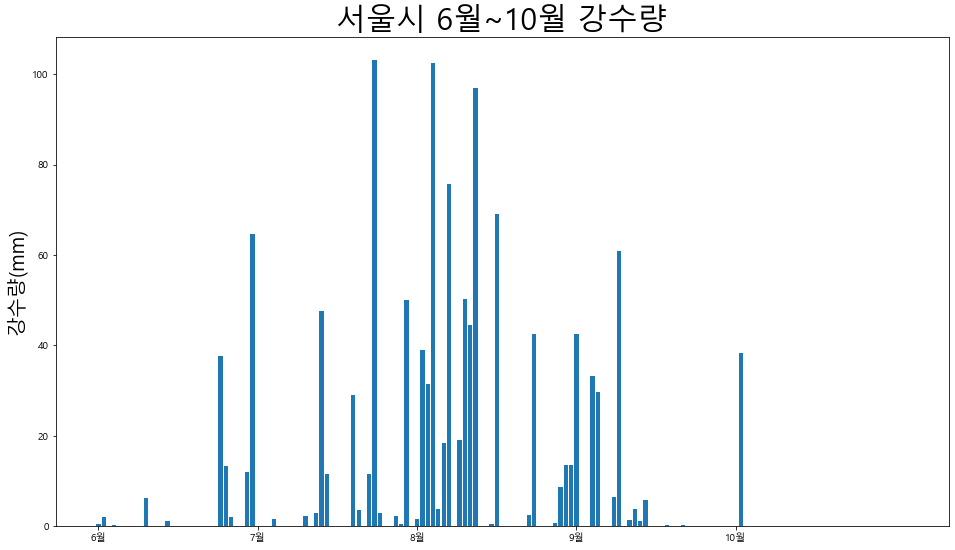

In [8]:
plt.figure(figsize=(16,9))
plt.bar(df['tm'],df['sumRn'])
plt.title('서울시 6월~10월 강수량',size=30)
plt.xticks([0,30,60,90,120],labels=['6월','7월','8월','9월','10월'])
plt.ylabel('강수량(mm)',size=20)
plt.show()

## 2. 서울시 열린데이터광장 에서 서울시 버스 이용승객 데이터(csv파일 다운후) 가져오기

In [9]:
df_list=[]
for i in range(5):
    df_list.append(pd.read_csv(f'data/bus_{202006+i}.csv', encoding='cp949'))
df_list

[             사용일자  노선번호                 노선명 버스정류장ARS번호                역명  \
 0        20200601  9709  9709번(파주시 맥금동~서울역)      12023     불광역3호선.서울혁신파크   
 1        20200601  9709  9709번(파주시 맥금동~서울역)      12026    한전성서지사.북한산푸르지오   
 2        20200601  9709  9709번(파주시 맥금동~서울역)      12025    한전성서지사.북한산푸르지오   
 3        20200601  9709  9709번(파주시 맥금동~서울역)      12028               녹번역   
 4        20200601  9709  9709번(파주시 맥금동~서울역)      12027               녹번역   
 ...           ...   ...                 ...        ...               ...   
 1048570  20200628   162        162번(정릉~여의도)       1256            원남동사거리   
 1048571  20200628   162        162번(정릉~여의도)       1218            현대그룹빌딩   
 1048572  20200628   162        162번(정릉~여의도)       1219         방송통신대.이화장   
 1048573  20200628   162        162번(정릉~여의도)       1220        혜화역.마로니에공원   
 1048574  20200628   162        162번(정릉~여의도)       1229  혜화역.동성중고(장면총리가옥)   
 
          승차총승객수  하차총승객수      등록일자  
 0             7       1  20200604  


In [10]:
df1=pd.concat(df_list)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5643960 entries, 0 to 1195415
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   사용일자        int64 
 1   노선번호        object
 2   노선명         object
 3   버스정류장ARS번호  object
 4   역명          object
 5   승차총승객수      int64 
 6   하차총승객수      int64 
 7   등록일자        int64 
dtypes: int64(4), object(4)
memory usage: 387.5+ MB


In [12]:
df1

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20200601,9709,9709번(파주시 맥금동~서울역),12023,불광역3호선.서울혁신파크,7,1,20200604
1,20200601,9709,9709번(파주시 맥금동~서울역),12026,한전성서지사.북한산푸르지오,5,5,20200604
2,20200601,9709,9709번(파주시 맥금동~서울역),12025,한전성서지사.북한산푸르지오,1,2,20200604
3,20200601,9709,9709번(파주시 맥금동~서울역),12028,녹번역,3,8,20200604
4,20200601,9709,9709번(파주시 맥금동~서울역),12027,녹번역,9,3,20200604
...,...,...,...,...,...,...,...,...
1195411,20201031,마포09,마포09(망원유수지~신촌전철역),14936,새화빌딩,13,58,20201103
1195412,20201031,5625,5625번(안양~영등포역(영등포시장)),57006,안양예술공원지하도,20,51,20201103
1195413,20201031,동작13,동작13(봉천고개관악현대아파트~대방역),21239,관악드림타운115동,54,7,20201103
1195414,20201031,7734,7734번(진관공영차고지~홍대입구역),13230,명지대사거리제일은행앞,108,66,20201103


In [13]:
df2=df1.groupby('사용일자').sum()[['승차총승객수']]
df2

,승차총승객수
사용일자,
20200601,4630799
20200602,4520949
20200603,4755258
20200604,4717214
20200605,4839455
...,...
20201027,4866223
20201028,4930573
20201029,4884661


In [14]:
df2=df2.reset_index()
df2

,사용일자,승차총승객수
0,20200601,4630799
1,20200602,4520949
2,20200603,4755258
3,20200604,4717214
4,20200605,4839455
...,...,...
143,20201027,4866223
144,20201028,4930573
145,20201029,4884661
146,20201030,5007101


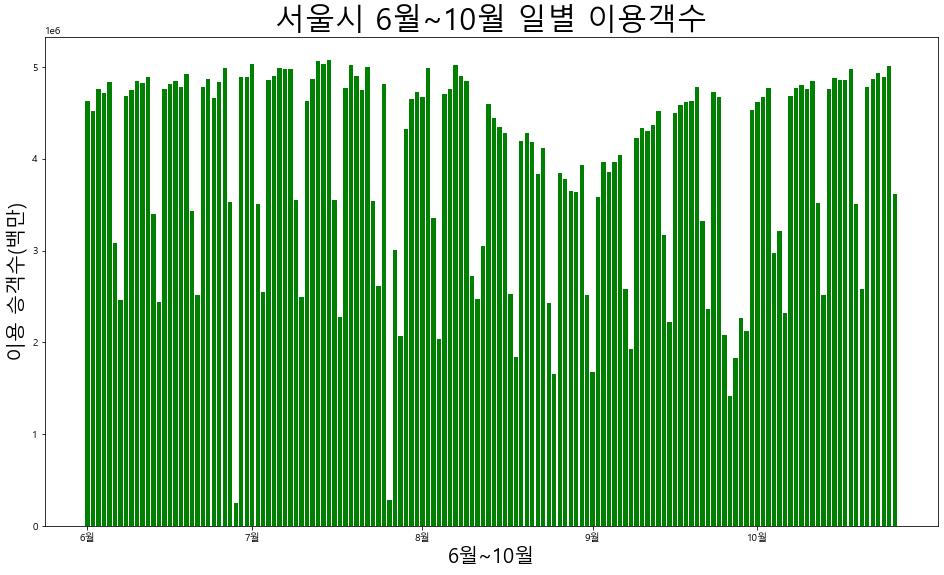

In [41]:
plt.figure(figsize=(16,9))
plt.bar(df2.index, df2['승차총승객수'],color='green')
plt.xticks([0,30,61,92,122],labels=['6월','7월','8월','9월','10월'])
plt.title('서울시 6월~10월 일별 이용객수',size=30)
plt.xlabel('6월~10월',size=20)
plt.ylabel('이용 승객수(백만)',size=20)
plt.show()

## 종합

In [15]:
df2['강수량']=df['sumRn']

In [16]:
df2

,사용일자,승차총승객수,강수량
0,20200601,4630799,0.4
1,20200602,4520949,2.0
2,20200603,4755258,0.0
3,20200604,4717214,0.2
4,20200605,4839455,0.0
...,...,...,...
143,20201027,4866223,0.0
144,20201028,4930573,0.0
145,20201029,4884661,0.0
146,20201030,5007101,0.0


In [17]:
df2['사용일자']=pd.to_datetime(df2['사용일자'],format='%Y%m%d') #날짜화 시키기
df2

,사용일자,승차총승객수,강수량
0,2020-06-01,4630799,0.4
1,2020-06-02,4520949,2.0
2,2020-06-03,4755258,0.0
3,2020-06-04,4717214,0.2
4,2020-06-05,4839455,0.0
...,...,...,...
143,2020-10-27,4866223,0.0
144,2020-10-28,4930573,0.0
145,2020-10-29,4884661,0.0
146,2020-10-30,5007101,0.0


In [18]:
df2['dayofweek'] = df2['사용일자'].dt.dayofweek #요일 표시하기
df2

,사용일자,승차총승객수,강수량,dayofweek
0,2020-06-01,4630799,0.4,0
1,2020-06-02,4520949,2.0,1
2,2020-06-03,4755258,0.0,2
3,2020-06-04,4717214,0.2,3
4,2020-06-05,4839455,0.0,4
...,...,...,...,...
143,2020-10-27,4866223,0.0,1
144,2020-10-28,4930573,0.0,2
145,2020-10-29,4884661,0.0,3
146,2020-10-30,5007101,0.0,4


In [19]:
df_weekends = df2[(df2['dayofweek']==5) | (df2['dayofweek']==6)] #주말
df_week = df2[(df2['dayofweek']>=0) & (df2['dayofweek']<=4)] #평일

In [20]:
import scipy.stats as ss  ## z-score 계산
df_z_wks = pd.DataFrame(ss.zscore(df_weekends[['승차총승객수','강수량']]), columns=df_weekends.columns[1:3])
df_z_wk = pd.DataFrame(ss.zscore(df_week[['승차총승객수','강수량']]), columns=df_week.columns[1:3])

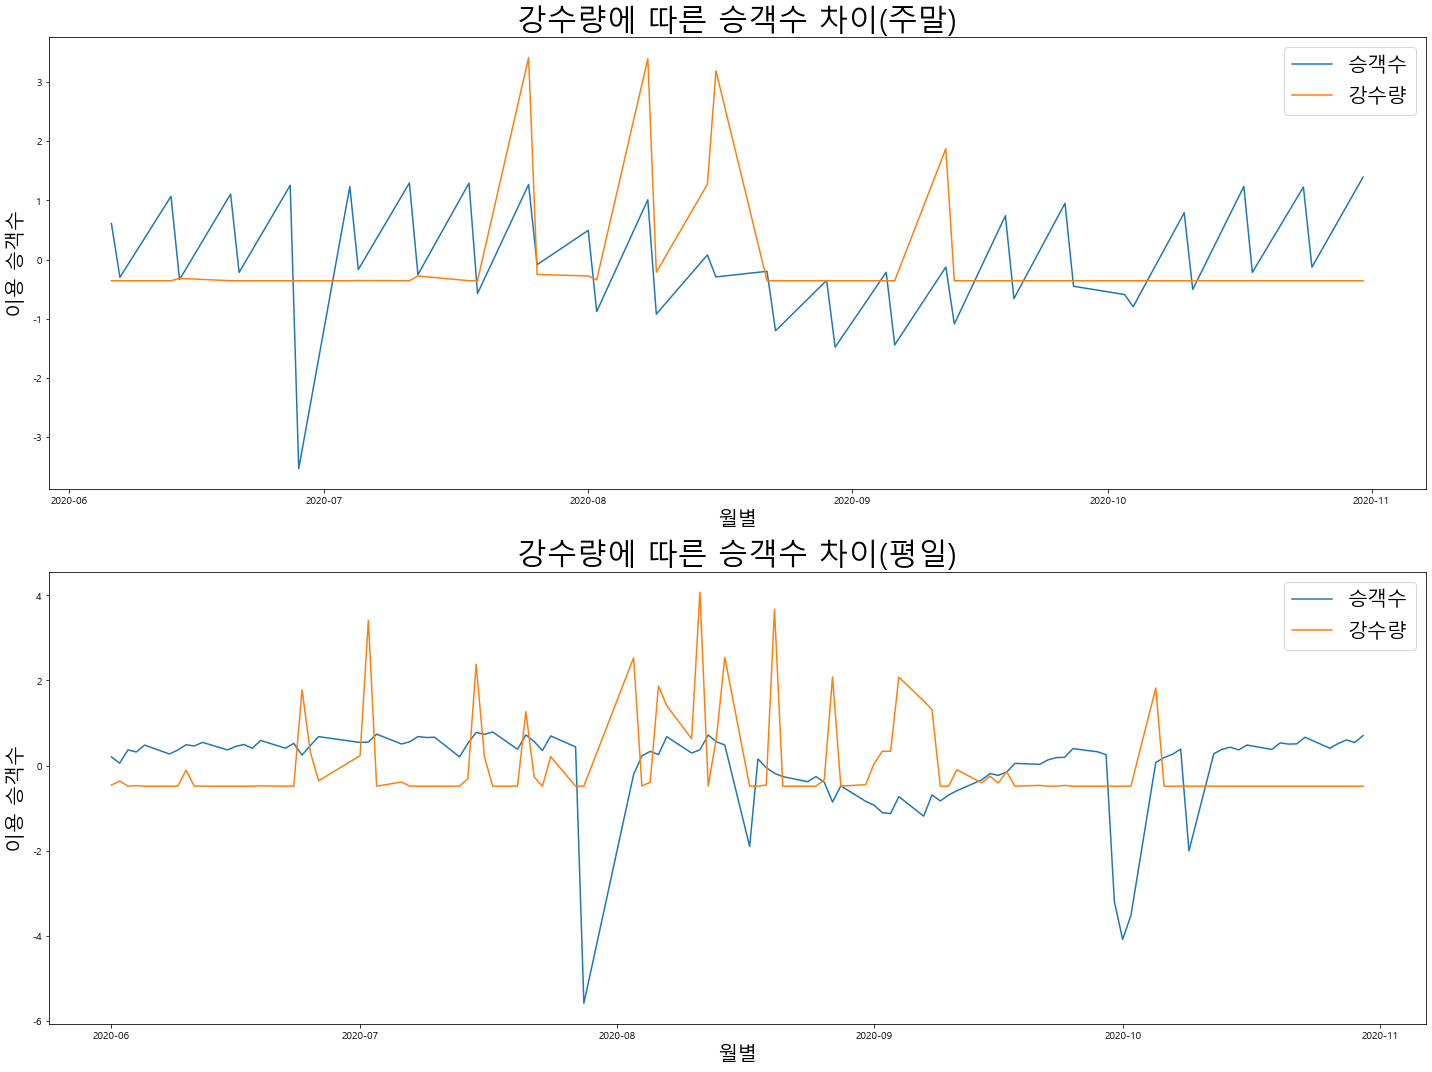

In [21]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.plot(df_weekends['사용일자'],df_z_wks['승차총승객수'],label=('승객수'))
plt.plot(df_weekends['사용일자'],df_z_wks['강수량'],label=('강수량'))
plt.xlabel('월별',size=20)
plt.ylabel('이용 승객수',size=20)
plt.legend(fontsize=20)
plt.title('강수량에 따른 승객수 차이(주말)',size=30)

plt.subplot(2,1,2)
plt.plot(df_week['사용일자'],df_z_wk['승차총승객수'],label=('승객수'))
plt.plot(df_week['사용일자'],df_z_wk['강수량'],label=('강수량'))
plt.xlabel('월별',size=20)
plt.ylabel('이용 승객수',size=20)
plt.legend(fontsize=20)
plt.title('강수량에 따른 승객수 차이(평일)',size=30)
plt.tight_layout()

plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [23]:
df_week

,사용일자,승차총승객수,강수량,dayofweek
0,2020-06-01,4630799,0.4,0
1,2020-06-02,4520949,2.0,1
2,2020-06-03,4755258,0.0,2
3,2020-06-04,4717214,0.2,3
4,2020-06-05,4839455,0.0,4
...,...,...,...,...
142,2020-10-26,4784713,0.0,0
143,2020-10-27,4866223,0.0,1
144,2020-10-28,4930573,0.0,2
145,2020-10-29,4884661,0.0,3


In [35]:
X=df_week[['강수량']]
y=df_week['승차총승객수']
X

,강수량
0,0.4
1,2.0
2,0.0
3,0.2
4,0.0
...,...
142,0.0
143,0.0
144,0.0
145,0.0


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [32]:
dt=DecisionTreeRegressor()

In [33]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
dt.predict(X_test)

array([4921414.        , 4479924.30434783, 3834956.        ,
       4479924.30434783, 4832092.        , 4903802.        ,
       4630799.        , 4896171.        , 4479924.30434783,
       4479924.30434783, 4479924.30434783, 4479924.30434783,
       4479924.30434783, 5020125.        , 5000788.        ,
       4479924.30434783, 4035039.        , 4479924.30434783,
       4479924.30434783, 4988479.        , 4479924.30434783,
       4479924.30434783, 4841738.        , 4479924.30434783,
       4841738.        , 4832092.        , 4479924.30434783])

In [36]:
dt.score(X_test, y_test)

-0.22465544271509308

In [39]:
dt.predict([[0.4]])

array([4630799.])

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
line_fitter = LinearRegression()
line_fitter.fit(X_test, y_test)

LinearRegression()

In [42]:
line_fitter.score(X_test, y_test)

2.883133484121725e-05

In [43]:
a=line_fitter.predict([[0.0]]) #강수량 입력하면 예상승객수 예측
a

array([4362105.00356248])

In [44]:
def bus_cnt(a):
    if a > 3000000 :
        print('하루 예상승객 3백만 이상 노선마다 버스 운행수 - 10대로 운영')
    elif a > 4000000 :
        print('예상승객 4백만 이상 노선마다 버스 운행수 - 15대로 운영')
    elif a > 5000000 :
        print('예상승객 5백만 이상 노선마다 버스 운행수 - 20대로 운영')
    else :
        print('예상승객 3백만 미만 노선마다 버스 운행수 - 8대로 운영')
bus_cnt(a)

하루 예상승객 3백만 이상 노선마다 버스 운행수 - 10대
